# Project 02 - Image Processing

## Student Information

- Full name: Đinh Xuân Khương
- Student ID: 23127398
- Class: 23CLC04

## Required Libraries

In [2]:
# IMPORT YOUR LIBS HERE
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image

## Function Definitions

In [111]:

def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D) : np.ndarray
    '''
    try: 
        img = Image.open(img_path)
    except FileNotFoundError:
        print("File not found!")
    img.convert("RGB")  
    img = np.array(img)  
    return img 


def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img: numpy.ndarray
        Image (2D)
        
    Outputs
    -------
        An image is showed using matplotlib
    '''
    plt.imshow(img)
    plt.axis("off")
    plt.show()




def save_img(img : np.ndarray, img_path: str) -> None:
    '''
    Save image to img_path

    Parameters
    ----------
    img : numpy.ndarray
        Image (2D)
    img_path : str
        Path of image
    '''
    

    # YOUR CODE HERE


#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE
def brightness_control(img : np.ndarray, alpha : int) -> np.ndarray:
    '''
    Description
    -----------
    Adjust brightness of the image
    alpha is the value to adjust brightness
    
    
    Parameters
    ----------
    img : numpy.ndarray
        Image (2D)
    alpha : int
        Value to adjust brightness

    Returns
    -------
        Adjusted image (2D) : np.ndarray
    '''
    alpha = int(alpha)
    img = img.astype(np.int64)
    img = np.clip(img + alpha, 0, 255) 
    return img.astype(np.uint8) 


def contrast_control(img : np.ndarray, alpha : float) -> np.ndarray:
    '''
    Adjust contrast of the image

    Parameters
    ----------
    img : numpy.ndarray
        Image (2D)
    alpha : float
        Value to adjust contrast

    Returns
    -------
        Adjusted image (2D) : np.ndarray
    '''
    img = img.astype(np.int64)
    img = np.clip((img - 128) * alpha + 128, 0, 255) 
    return img.astype(np.uint8)

def flip_img(img : np.ndarray, orientation = 'V') -> np.ndarray: 
    '''
    Description
    -----------
    Flip image along the specified axis
        if orientation is 'V', flip vertically
        if orientation is 'H', flip horizontally
        default is 'V' (vertical flip)
        if orientation is not 'V' or 'H', it will default to horizontal flip
    
    
    Parameters
    ----------
    img : numpy.ndarray
        Image (2D)
    orientation : 'H' or 'V'
        Axis to flip the image ('V' for vertical, 'H' for horizontal)

    Returns
    -------
        Flipped image (2D) : np.ndarray
    '''
    
    axis = 0 if orientation == 'V' else 1  # 0 for vertical, 1 for horizontal
    return np.flip(img, axis=axis)
 

def to_gray(img: np.ndarray) -> np.ndarray:
    '''
    Convert image to grayscale image.

    Parameters
    ----------
    img : numpy.ndarray
        Input image (3D array with shape [height, width, 3] for RGB).

    Returns
    -------
    numpy.ndarray
        Grayscale image (2D array with shape [height, width]).
    '''
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError("Input image must be a 3-channel RGB image (shape [H, W, 3])")

    R = img[:, :, 0].astype(np.float32)
    G = img[:, :, 1].astype(np.float32)
    B = img[:, :, 2].astype(np.float32)

    gray_img = 0.299 * R + 0.587 * G + 0.114 * B
    gray_img = np.stack((gray_img,)*3, axis=-1) 
    gray_img = np.clip(gray_img, 0, 255).astype(np.uint8)

    return gray_img
def to_sepia(img: np.ndarray) -> np.ndarray:
    '''
    Convert image to sepia tone.

    Parameters
    ----------
    img : numpy.ndarray
        Input image (3D array with shape [height, width, 3] for RGB).

    Returns
    -------
    numpy.ndarray
        Sepia-toned image (3D array with shape [height, width, 3]).
    '''
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError("Input image must be a 3-channel RGB image (shape [H, W, 3])")

    R = img[:, :, 0].astype(np.float32)
    G = img[:, :, 1].astype(np.float32)
    B = img[:, :, 2].astype(np.float32)
    
    sepia_r = 0.393*R + 0.769*G + 0.189*B
    sepia_g = 0.349*R + 0.686*G + 0.168*B
    sepia_b = 0.272*R + 0.534*G + 0.131*B
    sepia_img = np.stack((sepia_r, sepia_g, sepia_b), axis=-1)  
    sepia_img = np.clip(sepia_img, 0, 255).astype(np.uint8)

    return sepia_img

def sharpen(img: np.ndarray) -> np.ndarray:
    '''
    Sharpen the image using a convolution kernel.

    Parameters
    ----------
    img : numpy.ndarray
        Input image (3D array with shape [height, width, 3] for RGB).

    Returns
    -------
    numpy.ndarray
        Sharpened image (3D array with shape [height, width, 3]).
    '''
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError("Input image must be a 3-channel RGB image (shape [H, W, 3])")

    kernel = np.array([[ 0, -1,  0],
                   [-1,  5, -1],
                   [ 0, -1,  0]])

    padded_img = np.pad(img, ((1, 1), (1, 1), (0, 0)), mode='constant', constant_values=0)

    sharpened = np.zeros_like(img)

    for c in range(3):  # R, G, B
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                region = padded_img[i:i+3, j:j+3, c]
                sharpened[i, j, c] = np.clip(np.sum(region * kernel), 0, 255)

    return sharpened.astype(np.uint8)

def box_blur(img: np.ndarray) -> np.ndarray:
    '''
    Apply a box blur to the image.
    Parameters
    ----------
    img : numpy.ndarray
        Input image (3D array with shape [height, width, 3] for RGB).
    Returns
    -------
    numpy.ndarray
        Blurred image (3D array with shape [height, width, 3]).
    '''
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError("Input image must be a 3-channel RGB image (shape [H, W, 3])")
    
    kernel = (1/9) * np.array([[1, 1, 1],
                               [1, 1, 1],
                               [1, 1, 1]])
    
    padded_img = np.pad(img, ((1,1), (1,1), (0, 0)), mode = 'constant', constant_values = 0)
    
    blur_img = np.zeros_like(img)
    for c in range(3):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                region = padded_img[i:i+3, j:j+3, c]
                blur_img[i, j, c] = np.clip(np.sum(region * kernel), 0, 255)
    
    return blur_img.astype(np.uint8)

def gaussian_blur3(img: np.ndarray) -> np.ndarray:
    '''
    Apply Gaussian blur to the image.
    
    Parameters
    ----------
    img : numpy.ndarray
        Input image (3D array with shape [height, width, 3] for RGB).
        
    Returns
    -------
    numpy.ndarray
        Blurred image (3D array with shape [height, width, 3]).
    '''
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError("Input image must be a 3-channel RGB image (shape [H, W, 3])")
    
    kernel = (1/16) * np.array([[1, 2, 1],
                               [2, 4, 2],
                               [1, 2, 1]])
    
    padded_img = np.pad(img, ((1,1), (1,1), (0, 0)), mode = 'constant', constant_values = 0)
    
    blur_img = np.zeros_like(img)
    for c in range(3):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                region = padded_img[i:i+3, j:j+3, c]
                blur_img[i, j, c] = np.clip(np.sum(region * kernel), 0, 255)
    
    return blur_img.astype(np.uint8)
  
def gaussian_blur5(img: np.ndarray) -> np.ndarray:
    '''
    Apply Gaussian blur to the image.
    
    Parameters
    ----------
    img : numpy.ndarray
        Input image (3D array with shape [height, width, 3] for RGB).
        
    Returns
    -------
    numpy.ndarray
        Blurred image (3D array with shape [height, width, 3]).
    '''
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError("Input image must be a 3-channel RGB image (shape [H, W, 3])")
    
    kernel = (1/256) * np.array([[1, 4, 6, 4, 1],
                                 [4, 16, 24, 16, 4],
                                 [6, 24, 36, 24, 6],
                                 [4, 16, 24, 16, 4],
                                 [1, 4, 6, 4, 1]])
    
    padded_img = np.pad(img, ((2,2), (2,2), (0, 0)), mode = 'constant', constant_values = 0)
    
    blur_img = np.zeros_like(img)
    
    for c in range(3):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                region = padded_img[i:i+5, j:j+5, c]
                blur_img[i, j, c] = np.clip(np.sum(region * kernel), 0, 255)
    
    return blur_img.astype(np.uint8)

def crop_img(img: np.ndarray) -> np.ndarray:
    '''
    crop the image to the center region.
    
    Parameters
    ----------
    img : numpy.ndarray
        Input image (3D array with shape [height, width, 3] for RGB).
        
    Returns
    -------
    numpy.ndarray
        cropped image (3D array with shape [height/2, width/2, 3]).
    '''
    
    h, w, _ = img.shape
    
    new_img = img[h//4: h//4 + h//2, w//4 : w//4 + w//2,:]
    
    return new_img
    
    
def circle_crop(img: np.ndarray) -> np.ndarray:
    '''
    Crop the image to a circular region.
    
    Parameters
    ----------
    img : numpy.ndarray
        Input image (3D array with shape [height, width, 3] for RGB).
        
    Returns
    -------
    numpy.ndarray
        Circular cropped image (3D array with shape [height, width, 3]).
    '''
    
    h, w, _ = img.shape
    center = (h // 2, w // 2)
    radius = min(center)
    
    Y, X = np.ogrid[:h, :w]
    mask = (X - center[1])**2 + (Y - center[0])**2 <= radius**2
    
    circular_cropped_img = np.zeros_like(img)
    circular_cropped_img[mask] = img[mask]
    
    return circular_cropped_img          

def ellipse_crop(img: np.ndarray) -> np.ndarray:
    n = min(img.shape[:2])
    
    a_squared = (n**2) * 0.4 
    b_squared = (n**2) / 8

    h = k = n // 2
   
    Y, X = np.ogrid[:img.shape[0], :img.shape[1]]

    x = X - h
    y = Y - k

    theta1 = np.radians(45)
    theta2 = np.radians(135)


    u1 = x * np.cos(theta1) + y * np.sin(theta1)
    v1 = -x * np.sin(theta1) + y * np.cos(theta1)
    mask1 = ((u1**2) / a_squared + (v1**2) / b_squared <= 1)

    
    u2 = x * np.cos(theta2) + y * np.sin(theta2)
    v2 = -x * np.sin(theta2) + y * np.cos(theta2)
    mask2 = ((u2**2) / a_squared + (v2**2) / b_squared <= 1)

    
    ellipse_cropped_img = np.zeros_like(img)
    ellipse_cropped_img[mask1 | mask2] = img[mask1 | mask2]

    return ellipse_cropped_img

    

<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

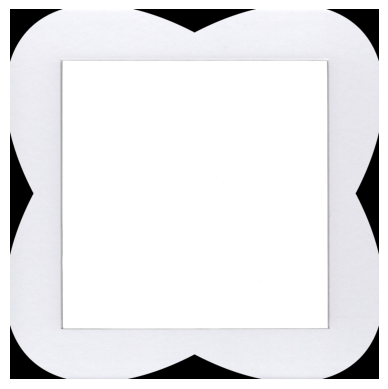

In [112]:
square = read_img("Tests/square.jpg")

square_ellipse_cropped_img = ellipse_crop(square)
show_img(square_ellipse_cropped_img)

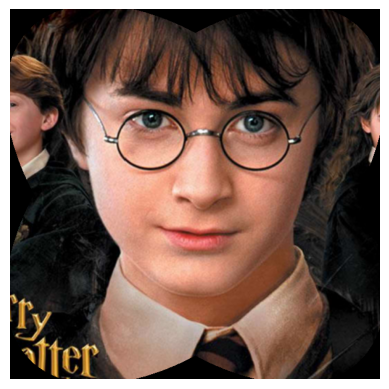

In [113]:
ellipse_cropped_img = ellipse_crop(img)
show_img(ellipse_cropped_img)

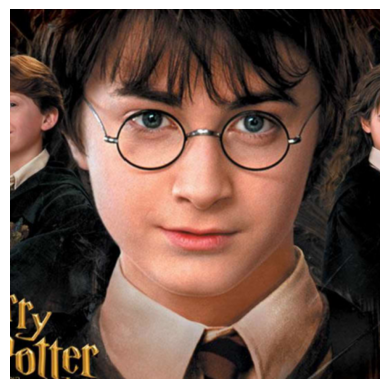

In [8]:
img_path = "Tests/harry.png"
img = read_img(img_path)
show_img(img)

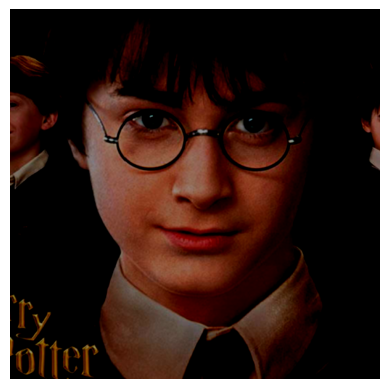

In [9]:

img_bright = brightness_control(img, -100.45)
show_img(img_bright)

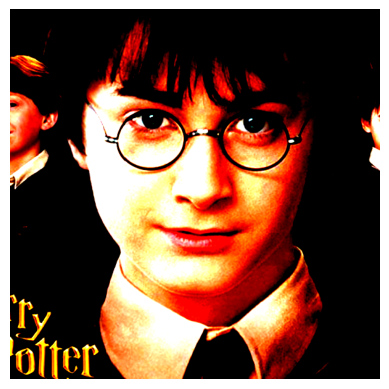

In [10]:

img_contrast = contrast_control(img, 4.5)
show_img(img_contrast)

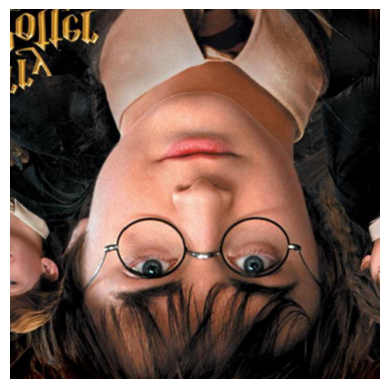

In [11]:
v_filp = flip_img(img, 'V')
show_img(v_filp)


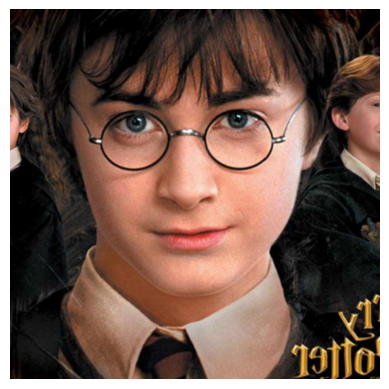

In [12]:
h_filp = flip_img(img, 'H')
show_img(h_filp)

Link: https://support.ptc.com/help/mathcad/r10.0/en/index.html#page/PTC_Mathcad_Help/example_grayscale_and_color_in_images.html

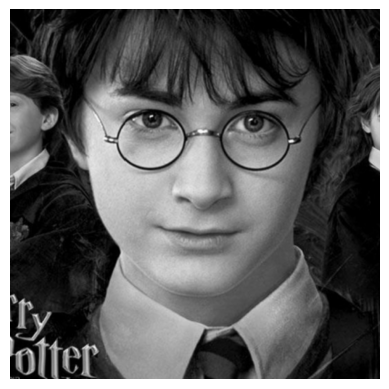

In [14]:
gray_img = to_gray(img)
show_img(gray_img)

link : https://dyclassroom.com/image-processing-project/how-to-convert-a-color-image-into-sepia-image

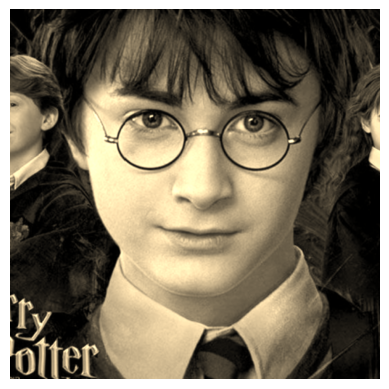

In [15]:
sepia_img = to_sepia(img)
show_img(sepia_img)

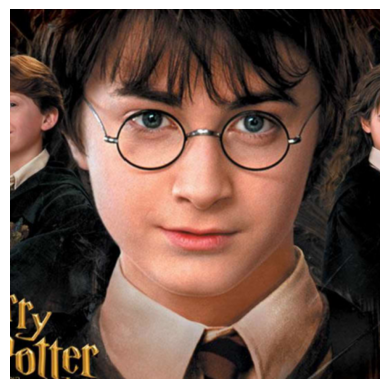

In [19]:
show_img(img)

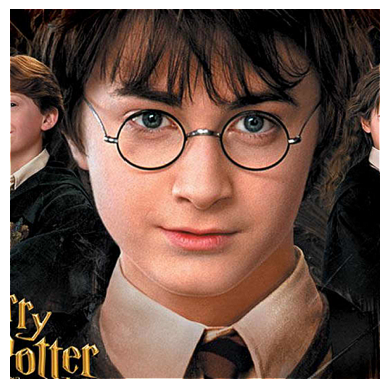

In [26]:
sharpened_img = sharpen(img)
show_img(sharpened_img)

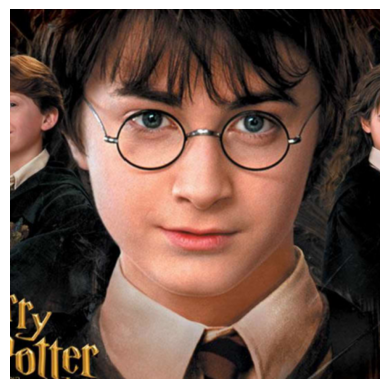

In [29]:
show_img(img)

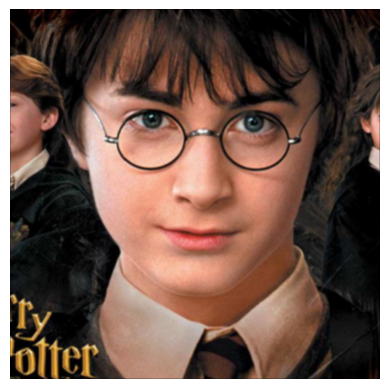

In [31]:
blur_img = box_blur(img)
show_img(blur_img)

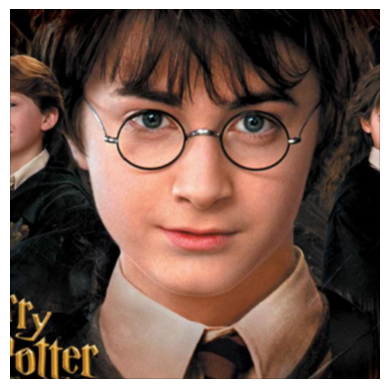

In [34]:
gaussian_blurred_img = gaussian_blur3(img)
show_img(gaussian_blurred_img)

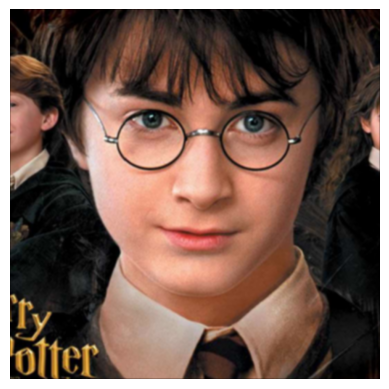

In [35]:
gaussian_blurred_5_img = gaussian_blur5(img)
show_img(gaussian_blurred_5_img)

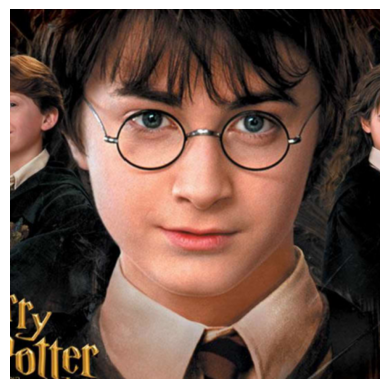

In [36]:
show_img(img)

(300, 300, 3)


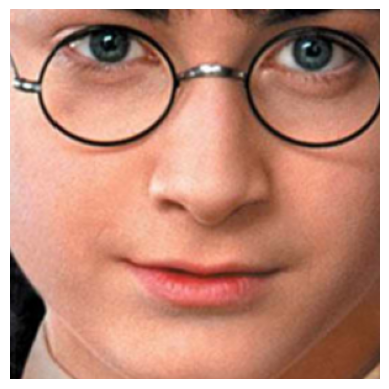

In [44]:
cropped_img = crop_img(img)
print(cropped_img.shape)
show_img(cropped_img)

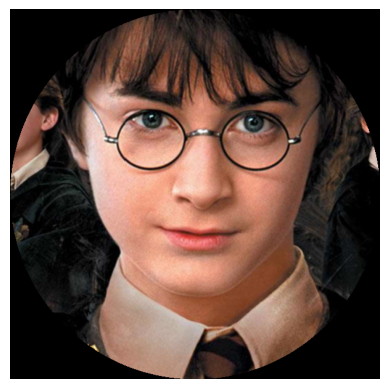

In [56]:
circular_cropped_img = circle_crop(img)
show_img(circular_cropped_img)

## Main FUNCTION

In [7]:
# YOUR CODE HERE

In [8]:
# Call main function